# Cálculo de valores 𝑝 en Regresión Ridge con Bootstrap. 
###### https://www.chreinvent.com/recursos/valor-p-en-regresi%C3%B3n-lineal
Supongamos que tenemos un conjunto de datos con predictores 𝑋 y una variable respuesta 𝑦. 

+ Usaremos la librería sklearn para ajustar el modelo Ridge y numpy para implementar el bootstrap.

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from scipy import stats  # Importación necesaria para calcular valores p

# Crear un conjunto de datos simulado
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
data = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])
data["y"] = y

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar un modelo Ridge
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)

# Función para realizar bootstrap y estimar coeficientes
n_bootstraps = 1000
coef_samples = []
for _ in range(n_bootstraps):
    # Muestra aleatoria con reemplazo
    indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_bootstrap = X_train[indices]
    y_bootstrap = y_train[indices]

    # Ajustar modelo Ridge a la muestra bootstrap
    ridge.fit(X_bootstrap, y_bootstrap)
    coef_samples.append(ridge.coef_)

# Convertir a array
coef_samples = np.array(coef_samples)

# Calcular medias, errores estándar y valores p
coef_means = np.mean(coef_samples, axis=0)
coef_stds = np.std(coef_samples, axis=0)
z_scores = coef_means / coef_stds
p_values = 2 * (1 - stats.norm.cdf(np.abs(z_scores)))

# Mostrar resultados
results = pd.DataFrame({
    "Predictor": [f"X{i+1}" for i in range(X.shape[1])],
    "Coef. Estimado": ridge.coef_,
    "Media Bootstrap": coef_means,
    "Error Estándar": coef_stds,
    "Z-Score": z_scores,
    "P-Valor": p_values
})

print(results)


  Predictor  Coef. Estimado  Media Bootstrap  Error Estándar    Z-Score  \
0        X1       63.046236        60.622060        1.178540  51.438292   
1        X2       95.657014        96.915042        1.173305  82.600014   
2        X3       60.906417        59.866951        1.350170  44.340313   
3        X4       55.159177        54.798589        1.018272  53.815293   
4        X5       36.636226        35.650440        1.125684  31.670025   

   P-Valor  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  


**Interpretación de los Resultados**

Coeficientes Estimados
+ Coef. Estimado: Valores ajustados por el modelo Ridge utilizando el conjunto de datos de entrenamiento. Indican el efecto de cada predictor sobre la variable dependiente y. 
+ Ejemplo: X1 tiene un coeficiente estimado de 63.0563.0563.05, lo que sugiere un impacto positivo significativo en y.

Media Bootstrap y Error Estándar
+ Media Bootstrap: Promedio de los coeficientes obtenidos a través de las n=1000 muestras bootstrap. 
+ Estas medias son cercanas a los coeficientes estimados iniciales, lo que indica estabilidad en las estimaciones del modelo Ridge. 
+ Ejemplo: Para X1, la media es 60.62, muy cercana al coeficiente inicial 63.05.

Error Estándar: Mide la variabilidad de los coeficientes a través de las muestras bootstrap. Valores pequeños sugieren coeficientes confiables. 
+ Ejemplo: X1 tiene un error estándar de 1.18, lo que implica que el coeficiente estimado es robusto.

Z-Scores y Valores P
+ Z-Score: Relación entre el coeficiente promedio y su error estándar. Z-scores altos indican que los coeficientes son significativamente diferentes de cero.
+    Ejemplo: X1 tiene un Z−Score=51.43, lo que indica una fuerte evidencia de significancia estadística.

P-Valor: La probabilidad de observar un coeficiente igual o más extremo si el verdadero coeficiente fuera cero. 
+ Los p-valores cercanos a 0 indican alta significancia estadística.
    + Ejemplo: Todos los p-valores son 0.00, lo que sugiere que todos los predictores (X1 a X5) son estadísticamente significativos.

**Visualización de los resultados**

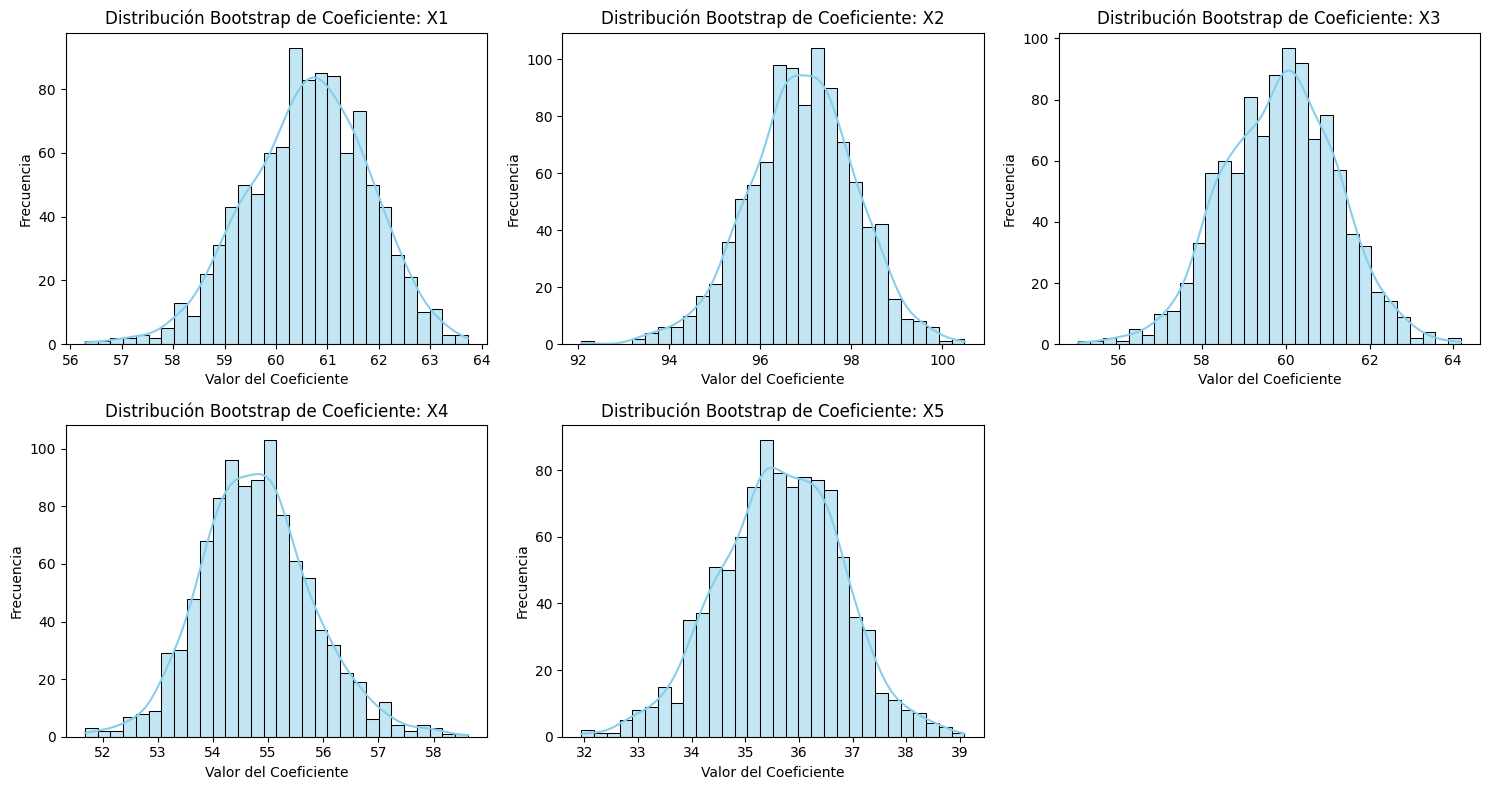

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de las distribuciones bootstrap
plt.figure(figsize=(15, 8))
for i in range(coef_samples.shape[1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(coef_samples[:, i], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribución Bootstrap de Coeficiente: X{i+1}")
    plt.xlabel("Valor del Coeficiente")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

**Visualización de las Distribuciones Bootstrap**

Se muestran además histogramas para visualizar las distribuciones de los coeficientes obtenidos a través del bootstrap. Esto nos ayuda a evaluar:
1. La estabilidad de los coeficientes.
2. Si las distribuciones son aproximadamente normales.

Allí se pueden ver dos cosas:
1. Histograma: Con la distribución de cada coeficiente a través de las muestras bootstrap.
2. Curva KDE: Muestra la densidad estimada, que debería ser simétrica y aproximadamente normal para coeficientes estables.

____________